# Data preparation

The objective of this notebook is to clean and prepare the dataset for machine learning modeling. This includes handling missing values encoding categorical variables, and scaling numerical features. A clean and well-structured dataset is essential to ensure accurate, reliable, and interpretable model performance.

In this notebook, we will use the Titanic dataset from [Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv), which contains information about passengers and whether they survived the Titanic shipwreck. 

## Import Libraries

The first step is to import the necessary libraries. In this notebook, we will use `Pandas` for cleaning and preparing the data.

In [1154]:
import pandas as pd 

## Read Dataset

Initially, we read the dataset from the csv using `read_csv` from `Pandas` library. 

In [1155]:
df = pd.read_csv("./titanic.csv")

## Explore the data

We can visualise the data using the `head` function. This function displays the first five rows of data. If we want to see fewer or more rows, we can indicate the number in the brackets. We can also visualise the last five rows using the `tail` function or by indicating the number in the same way as with `head`.

In [1156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If the dataset has many columns and `Pandas` doesn't display them all, use the following line to show them:

In [1157]:
pd.set_option('display.max_columns', None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Another way to see the list of columns in the dataset is by accessing the `.columns` attribute of the DataFrame. 

In [1158]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can visualize how big is the dataset. We can see that the dataset contains 891 passengers and 12 columns. 

In [1159]:
df.shape

(891, 12)

Another way to explore the dataset and see if they have null values is using `info`:

In [1160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Displays a summary of the DataFrame, including column names, data types and number of non-null values per column. From the output, we can see that the columns `Age`, `Cabin` and `Embarked` contain nulls.

Using `describe` function we can visualize not only the number of nulls but other statistics such as the mean, minimum, maximum, etc. Large differences between min/max and quartiles can hint at outliers, which might affect model training. Knowing the data range and spread helps decide if you need to scale, normalize, or apply other preprocessing steps.

In [1161]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## How to handle with missing values

As we have seen, three columns contain null values. We can apply for each of them one of these strategies: 
- Remove the rows with null values. 
- Change to 0. 
- Change by an aggregated measure. 

We will start by addressing the `Cabin` column. Since it contains many missing values and it’s not possible to assign a cabin number to all passengers, we will consider removing this column from the dataset.

In [1162]:
df = df.drop('Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let's address the `Embarked` column. We can see that there are only 2 missing values: 

In [1163]:
missing_embarked = df['Embarked'].isnull().sum()
print(f"Number of missing values in 'Embarked': {missing_embarked}")

Number of missing values in 'Embarked': 2


As they are few null values, we can fill with the most common value from that column: 

In [1164]:
print(df['Embarked'].mode()[0])

S


In [1165]:
df_moda = df.copy()
df_moda['Embarked'] = df_moda['Embarked'].fillna(df_moda['Embarked'].mode()[0])

In [1166]:
df_moda['Embarked'].isnull().sum()

0

Or, we can directly remove those 2 rows: 

In [1167]:
df = df.dropna(subset = ['Embarked'])

We can also fill the values from the `Age` with the median: 

In [1168]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [1169]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Categorical Data

We can only use numerical data when training our models. Therefore, we need to change our categorical columns (`Sex`and `Embarked`). To do so, we can: 
- Change the values to numbers. 
- One hot encoding. 

![onehotencoding](../Onehotencoding.png)

In [1170]:
embarked_mapping = {}

for value, key in enumerate(df["Embarked"].unique()):
    embarked_mapping[key] = value

print(embarked_mapping)
df["Embarked"] = df["Embarked"].apply(lambda x: embarked_mapping[x])

df.head()

{'S': 0, 'C': 1, 'Q': 2}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


In [1171]:
ohe_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df.drop(['Embarked'], axis=1), ohe_embarked], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,True,False,False


In [1172]:
clb = df.pop("Sex")
ohe_clb = pd.get_dummies(clb, prefix='Sex')
df = pd.concat([df.reset_index(drop=True), ohe_clb.reset_index(drop=True)], axis=1, sort=False)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,True,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,False,False,True


## Scaling

The data in this dataset have different ranges. These ranges can complicate the training of different models. To solve this, we need to scale them.

In statistics and its applications, normalization can have various interpretations. In straightforward situations, normalizing ratings involves adjusting values measured on diverse scales to a theoretically common scale, frequently done before averaging.

In [1173]:
print("Min ", df["Fare"].min()) 
print("Max ", df["Fare"].max())

Min  0.0
Max  512.3292


In [1174]:
print("Min ", df["Age"].min()) 
print("Max ", df["Age"].max())

Min  0.42
Max  80.0


Normalization between rank 0-1

In [1175]:
df[df["Name"] == "Brown, Mrs. James Joseph (Margaret Tobin)"]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
193,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",44.0,0,0,PC 17610,27.7208,False,True,False,True,False


In [1176]:
df[df["Name"] == "Andrews, Mr. Thomas Jr"]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
805,807,0,1,"Andrews, Mr. Thomas Jr",39.0,0,0,112050,0.0,True,False,False,False,True


In [1177]:
df["Age"] = (df["Age"]-df["Age"].min())/(df["Age"].max()-df["Age"].min())

In [1178]:
df["Fare"]= (df["Fare"]-df["Fare"].min())/(df["Fare"].max()-df["Fare"].min())

In [1179]:
df[df["Name"] == "Brown, Mrs. James Joseph (Margaret Tobin)"]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
193,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",0.547625,0,0,PC 17610,0.054107,False,True,False,True,False


In [1180]:
df[df["Name"] == "Andrews, Mr. Thomas Jr"]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
805,807,0,1,"Andrews, Mr. Thomas Jr",0.484795,0,0,112050,0.0,True,False,False,False,True


`See also`: [Standarization and Scaling](https://scikit-learn.org/stable/modules/preprocessing.html)

## All the data is useful?

Is `PassengerId` useful ? Is the `Ticket` column important? Is the `Name` necessary to determine if they survive?  

In [1181]:
df = df.drop(['PassengerId', 'Ticket', 'Name'] , axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Sex_female,Sex_male
0,0,3,0.271174,1,0,0.014151,True,False,False,False,True
1,1,1,0.472229,1,0,0.139136,False,True,False,True,False
2,1,3,0.321438,0,0,0.015469,True,False,False,True,False
3,1,1,0.434531,1,0,0.103644,True,False,False,True,False
4,0,3,0.434531,0,0,0.015713,True,False,False,False,True


In [1182]:
X = df.drop('Survived', axis=1)
y = df['Survived']

- Train a Decision Tree and plot the tree

In [1183]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [1184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1185]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7346938775510204

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       184
           1       0.64      0.66      0.65       110

    accuracy                           0.73       294
   macro avg       0.72      0.72      0.72       294
weighted avg       0.74      0.73      0.74       294



In [1186]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8231292517006803

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       184
           1       0.80      0.70      0.75       110

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



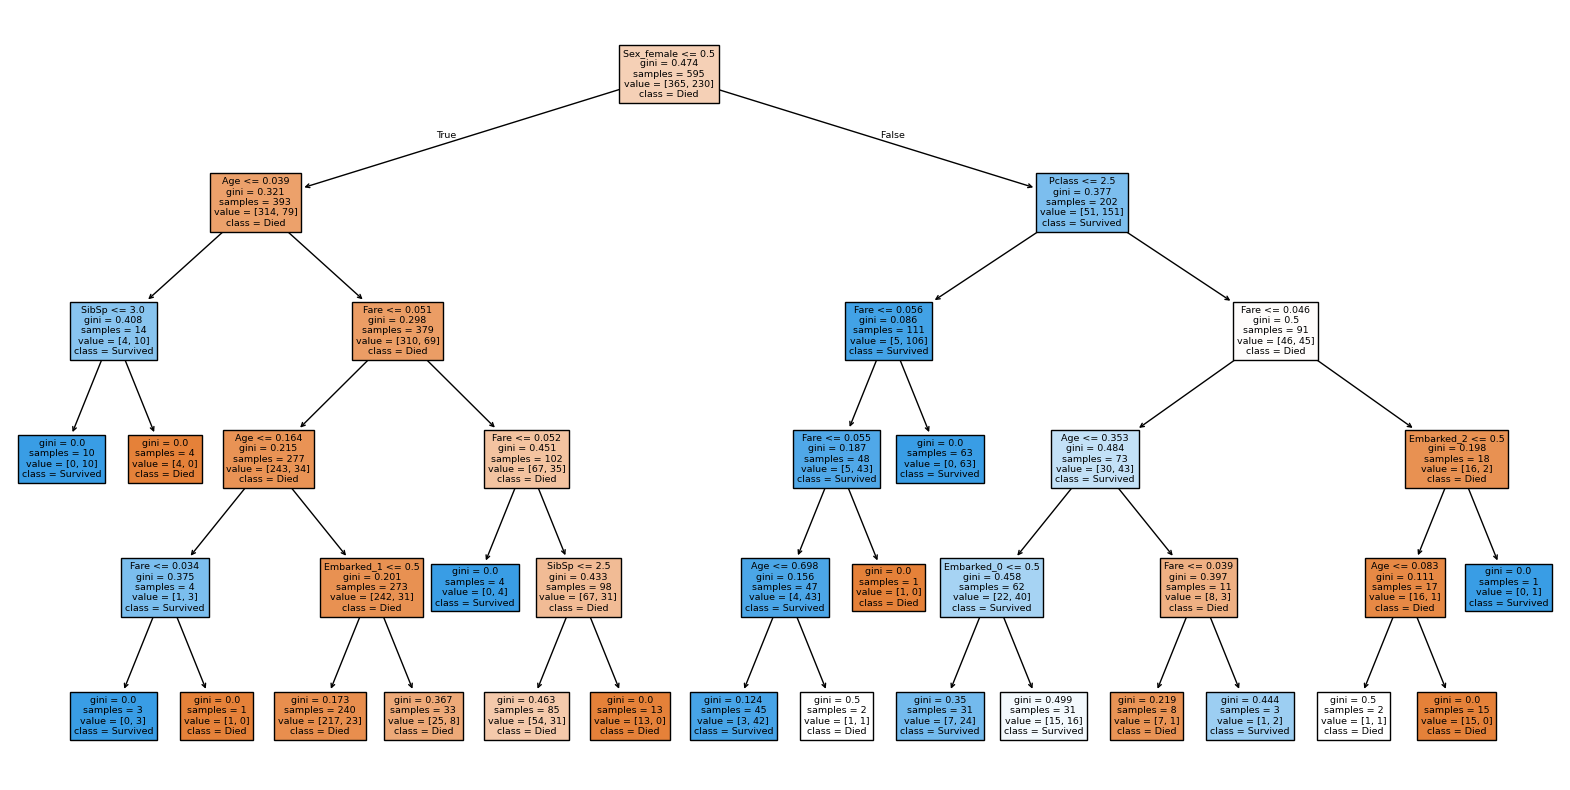

In [1187]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.show()

[[165  19]
 [ 33  77]]


<Axes: >

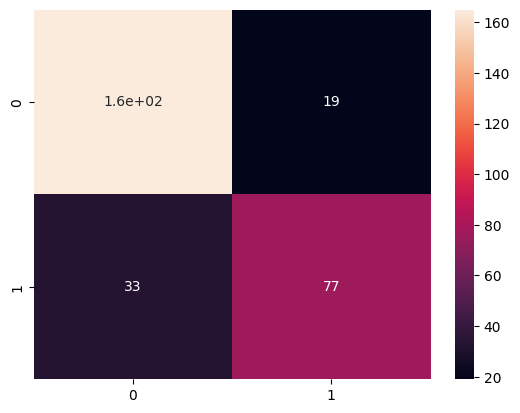

In [1188]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

- Train a Random Forest

In [1189]:
model = RandomForestClassifier(n_estimators=10,max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8231292517006803

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       184
           1       0.80      0.70      0.75       110

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



[[165  19]
 [ 33  77]]


<Axes: >

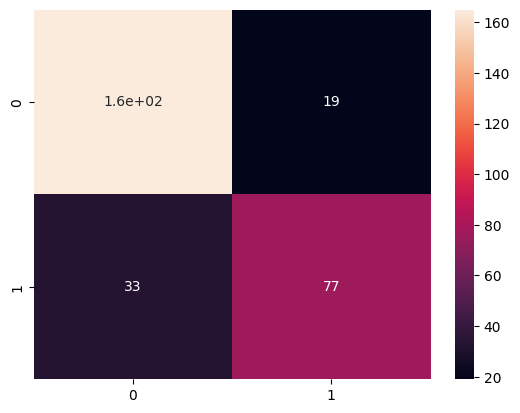

In [1190]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

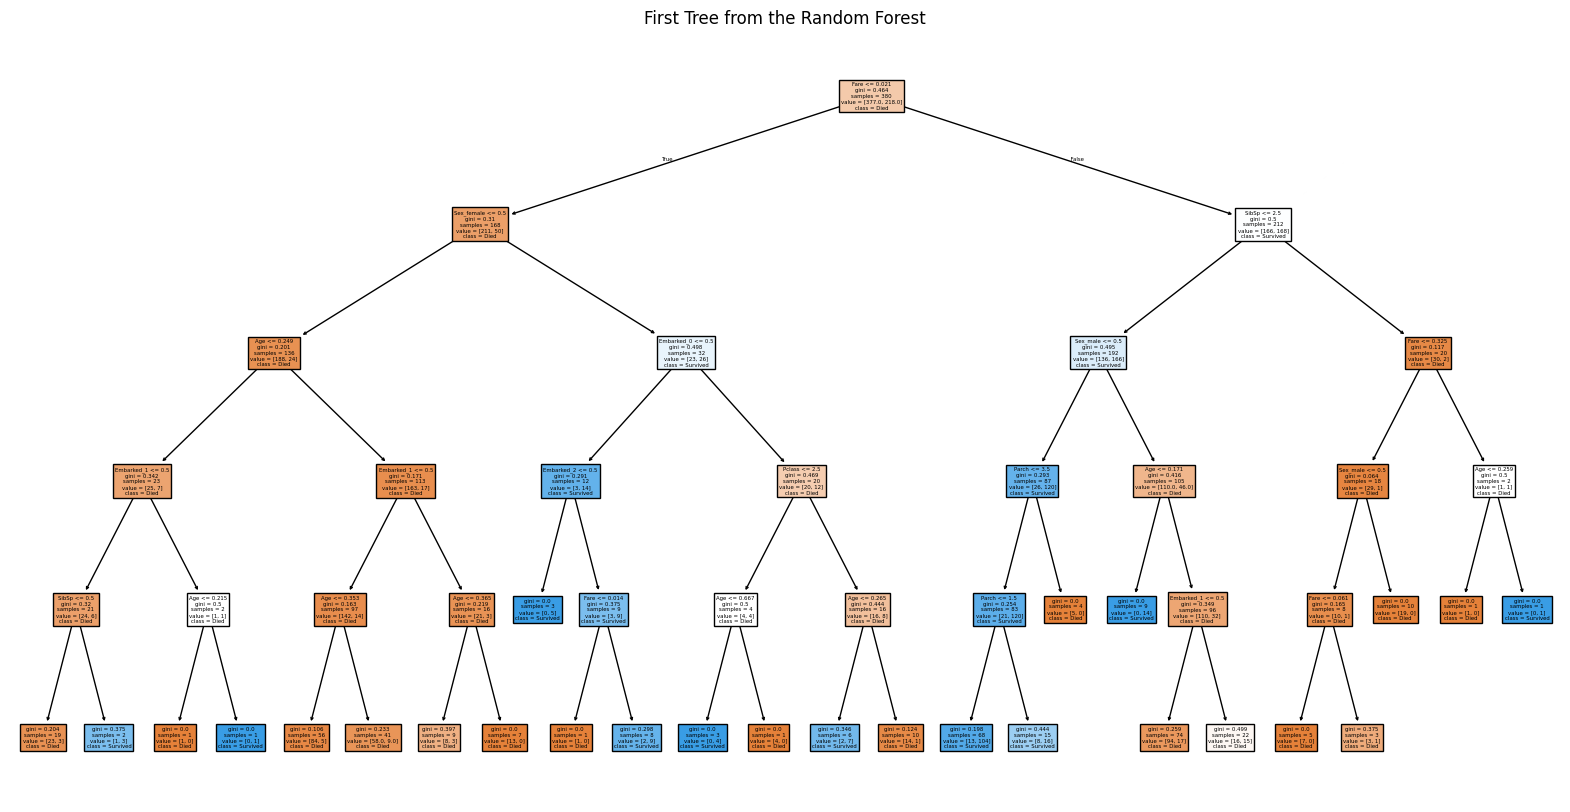

In [1191]:
estimator = model.estimators_[0]

# Graficarlo
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.title("First Tree from the Random Forest")
plt.show()

- Compare these models with other models taught previously. 